**Predicting the sale price of Bulldozers using machine learning**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [2]:
df=pd.read_csv("data/trainAndValid.csv",low_memory=False)

In [3]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [5]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [6]:
df.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

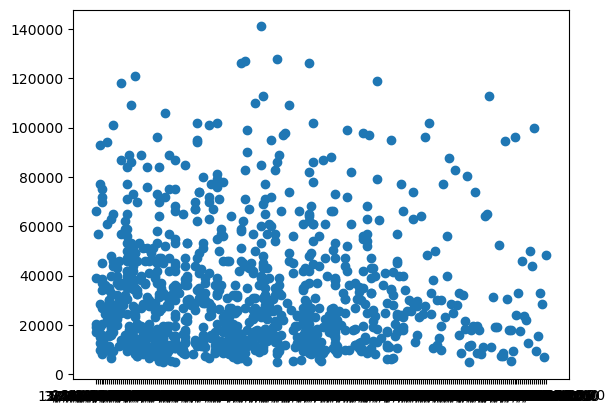

In [7]:
fig,ax=plt.subplots()
ax.scatter(df["saledate"][:1000],df["SalePrice"][:1000]);


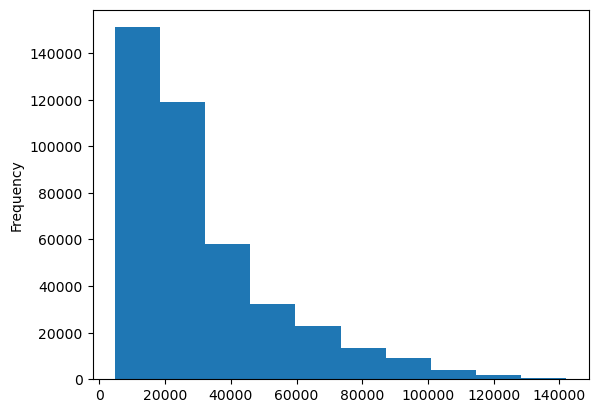

In [8]:
df.SalePrice.plot.hist();

#Parsing dates

In [9]:
df = pd.read_csv("data/trainAndValid.csv", low_memory=False)
df['saledate'] = pd.to_datetime(df['saledate'], errors='coerce')

In [10]:
df.saledate.dtype

dtype('<M8[ns]')

In [11]:
df.saledate[:1000]

0     2006-11-16
1     2004-03-26
2     2004-02-26
3     2011-05-19
4     2009-07-23
         ...    
995   2009-07-16
996   2007-06-14
997   2005-09-22
998   2005-07-28
999   2011-06-16
Name: saledate, Length: 1000, dtype: datetime64[ns]

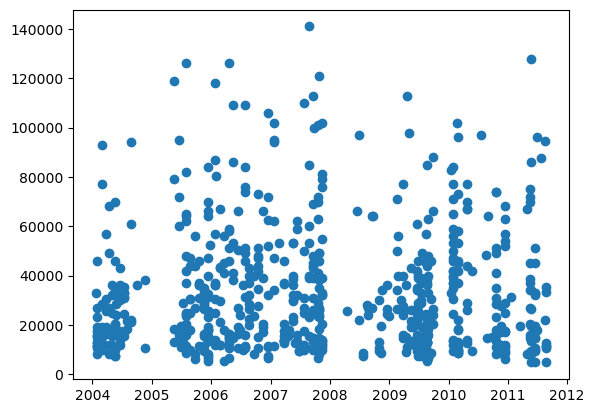

In [12]:
fig,ax=plt.subplots()
ax.scatter(df["saledate"][:1000],df["SalePrice"][:1000]);

In [13]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [15]:
df.saledate.head(20)

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
5    2008-12-18
6    2004-08-26
7    2005-11-17
8    2009-08-27
9           NaT
10   2008-08-21
11   2006-08-24
12   2005-10-20
13   2006-01-26
14          NaT
15   2006-11-16
16   2007-06-14
17   2010-01-28
18          NaT
19   2005-11-17
Name: saledate, dtype: datetime64[ns]

**sort data by saledate**

In [16]:
df.sort_values(by=["saledate"],inplace=True,ascending=True)
df.saledate.head(20)

205615   1989-01-17
87602    1989-01-31
76171    1989-01-31
78445    1989-01-31
238656   1989-01-31
113454   1989-01-31
28927    1989-01-31
274835   1989-01-31
63155    1989-01-31
101796   1989-01-31
140922   1989-01-31
54653    1989-01-31
115102   1989-01-31
63166    1989-01-31
127521   1989-01-31
113394   1989-01-31
54181    1989-01-31
152689   1989-01-31
142669   1989-01-31
67974    1989-01-31
Name: saledate, dtype: datetime64[ns]

In [17]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
87602,1391932,41000.0,154142,7008,132,99.0,1981,NaN,NaN,1989-01-31,...,30 inch,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
76171,1364654,14000.0,1270628,7289,132,99.0,1968,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
78445,1371695,28000.0,1444477,1571,132,99.0,1982,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
238656,1740836,10000.0,1531656,11933,132,99.0,1975,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN


**Make a copy of the original data**

In [18]:
df_tmp=df.copy()

**Adding datetime parameters for saledate column**

In [19]:
df_tmp["saleYear"]=df_tmp.saledate.dt.year
df_tmp["saleMonth"]=df_tmp.saledate.dt.month
df_tmp["saleDay"]=df_tmp.saledate.dt.day
df_tmp["saleDayOfWeek"]=df_tmp.saledate.dt.dayofweek
df_tmp["saleDayOfyear"]=df_tmp.saledate.dt.dayofyear

In [20]:
df_tmp.head().T

,205615,87602,76171,78445,238656
SalesID,1646770,1391932,1364654,1371695,1740836
SalePrice,9500.0,41000.0,14000.0,28000.0,10000.0
MachineID,1126363,154142,1270628,1444477,1531656
ModelID,8434,7008,7289,1571,11933
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1981,1968,1982,1975
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [21]:
df_tmp.drop("saledate",axis=1,inplace=True)

In [22]:
df_tmp.state.value_counts()

state
Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Iowa               1336
Montana            1336
Oklahoma           1326
Nebraska            866
West Virgi

In [23]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 412696
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-null   o

#turning data into numbers

**Converting strings to categories**

#finding the columns which contain strings

In [25]:
string_columns = df_tmp.select_dtypes(include='object').columns
for i in string_columns:
    print(i)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [26]:
for label, content in df_tmp.items():
    if pd.api.types.is_object_dtype(content):
        df_tmp[label] = content.astype(str)

for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label] = content.astype("category").cat.as_ordered()

In [27]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 412696
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 412698 non-null  category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           412698 non-null  category
 12  fiModelSeries             412698 non-null  category
 13  fiModelDescriptor         412

In [28]:
df_tmp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [29]:
df_tmp.state.value_counts()

state
Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virgi

In [30]:
df_tmp.state.cat.codes

205615    43
87602      8
76171      8
78445      8
238656     8
          ..
412671     8
412673    43
412674     0
412693    43
412696    43
Length: 412698, dtype: int8

**Save preprocessed data**

In [31]:
df_tmp.to_csv("data/train_tmp.csv",index=False)


In [32]:
df_tmp=pd.read_csv("data/train_tmp.csv",low_memory=False)

In [34]:
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfyear
0,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,TD20,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989.0,1.0,17.0,1.0,17.0
1,1391932,41000.0,154142,7008,132,99.0,1981,NaN,NaN,225,...,NaN,NaN,NaN,NaN,NaN,1989.0,1.0,31.0,1.0,31.0
2,1364654,14000.0,1270628,7289,132,99.0,1968,NaN,NaN,980,...,NaN,NaN,NaN,Standard,Conventional,1989.0,1.0,31.0,1.0,31.0
3,1371695,28000.0,1444477,1571,132,99.0,1982,NaN,NaN,D5BLGP,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989.0,1.0,31.0,1.0,31.0
4,1740836,10000.0,1531656,11933,132,99.0,1975,NaN,NaN,D65,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989.0,1.0,31.0,1.0,31.0


**Fill missing values**

In [35]:
for label,content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayOfWeek
saleDayOfyear


In [36]:
for label,content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayOfWeek
saleDayOfyear


In [37]:
#fill numeric rows with the median

for label,content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            df_tmp[label+"_is_missing"]=pd.isnull(content)
            df_tmp[label]=content.fillna(content.median())

In [38]:
for label,content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [39]:
df_tmp.auctioneerID_is_missing.value_counts()

auctioneerID_is_missing
False    392562
True      20136
Name: count, dtype: int64

In [40]:
df_tmp.isna().sum()

SalesID                     0
SalePrice                   0
MachineID                   0
ModelID                     0
datasource                  0
                           ..
saleYear_is_missing         0
saleMonth_is_missing        0
saleDay_is_missing          0
saleDayOfWeek_is_missing    0
saleDayOfyear_is_missing    0
Length: 64, dtype: int64

**Filling and turning categorical variables into numbers**

In [41]:
#check for columns which aren't numeric

for label,content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [42]:
pd.Categorical(df_tmp["state"]).codes+1

array([44,  9,  9, ...,  1, 44, 44], dtype=int8)

In [43]:
for label,content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        df_tmp[label+"_is_missing"]=pd.isnull(content)
        df_tmp[label]=pd.Categorical(content).codes+1

C:\Users\hp\AppData\Local\Temp\ipykernel_27664\2060200906.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_tmp[label+"_is_missing"]=pd.isnull(content)
C:\Users\hp\AppData\Local\Temp\ipykernel_27664\2060200906.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_tmp[label+"_is_missing"]=pd.isnull(content)


In [44]:
df_tmp.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 108, dtype: int64

In [45]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Columns: 108 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(51), float64(8), int16(4), int64(5), int8(40)
memory usage: 79.9 MB


In [46]:
df_tmp.head().T

,0,1,2,3,4
SalesID,1646770,1391932,1364654,1371695,1740836
SalePrice,9500.0,41000.0,14000.0,28000.0,10000.0
MachineID,1126363,154142,1270628,1444477,1531656
ModelID,8434,7008,7289,1571,11933
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,True,False,False
Blade_Type_is_missing,False,True,True,False,False
Travel_Controls_is_missing,False,True,True,False,False
Differential_Type_is_missing,True,True,False,True,True


#Now lets fit the machine learning model

In [47]:
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,0,4593,...,True,True,True,True,True,False,False,False,True,True
1,1391932,41000.0,154142,7008,132,99.0,1981,0.0,0,322,...,False,False,False,False,False,True,True,True,True,True
2,1364654,14000.0,1270628,7289,132,99.0,1968,0.0,0,1783,...,True,True,True,True,True,True,True,True,False,False
3,1371695,28000.0,1444477,1571,132,99.0,1982,0.0,0,2211,...,True,True,True,True,True,False,False,False,True,True
4,1740836,10000.0,1531656,11933,132,99.0,1975,0.0,0,2261,...,True,True,True,True,True,False,False,False,True,True


In [50]:
%%time
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_jobs=-1,random_state=42)

model.fit(df_tmp.drop("SalePrice",axis=1),df_tmp["SalePrice"])

CPU times: total: 30min 34s
Wall time: 2min 55s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [51]:
model.score(df_tmp.drop("SalePrice",axis=1),df_tmp["SalePrice"])

0.9831161688105851

**Splitting data into train/validation sets**

In [52]:
df_tmp.saleYear.value_counts()

saleYear
2006.0    164037
2009.0     28268
2008.0     25038
2011.0     24295
2010.0     22096
2007.0     19212
2004.0     13079
2005.0     12911
2001.0     11568
2000.0     11568
2002.0     10452
2003.0      9170
2012.0      8207
1998.0      7812
1999.0      7464
1997.0      6087
1996.0      5388
1994.0      5169
1995.0      5011
1993.0      3838
1992.0      3236
1991.0      3207
1989.0      2926
1990.0      2659
Name: count, dtype: int64

In [53]:
df_val=df_tmp[df_tmp.saleYear==2012.0]
df_train=df_tmp[df_tmp.saleYear!=2012.0]

len(df_val),len(df_train)

(8207, 404491)

In [54]:
X_train,y_train=df_train.drop("SalePrice",axis=1),df_train.SalePrice
X_valid,y_valid=df_val.drop("SalePrice",axis=1),df_val.SalePrice

X_train.shape,y_train.shape,X_valid.shape,y_valid.shape

((404491, 107), (404491,), (8207, 107), (8207,))

In [55]:
X_train

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1646770,1126363,8434,132,18.0,1974,0.0,0,4593,1744,...,True,True,True,True,True,False,False,False,True,True
1,1391932,154142,7008,132,99.0,1981,0.0,0,322,109,...,False,False,False,False,False,True,True,True,True,True
2,1364654,1270628,7289,132,99.0,1968,0.0,0,1783,541,...,True,True,True,True,True,True,True,True,False,False
3,1371695,1444477,1571,132,99.0,1982,0.0,0,2211,698,...,True,True,True,True,True,False,False,False,True,True
4,1740836,1531656,11933,132,99.0,1975,0.0,0,2261,711,...,True,True,True,True,True,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412693,6333229,1686621,21434,149,4.0,1000,0.0,0,427,146,...,False,False,False,False,False,True,True,True,True,True
412694,6333244,1816767,21434,149,2.0,2005,0.0,0,427,146,...,False,False,False,False,False,True,True,True,True,True
412695,6333248,1796000,21434,149,2.0,2002,0.0,0,427,146,...,False,False,False,False,False,True,True,True,True,True
412696,6333344,1919201,21435,149,2.0,2005,0.0,0,490,160,...,False,False,False,False,False,True,True,True,True,True


In [56]:
y_train

0          9500.0
1         41000.0
2         14000.0
3         28000.0
4         10000.0
           ...   
412693    10500.0
412694     9000.0
412695    12000.0
412696    10000.0
412697    10000.0
Name: SalePrice, Length: 404491, dtype: float64

In [57]:
X_valid

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
254559,1222905,1011145,17454,121,3.0,2005,3145.0,2,3473,1222,...,True,True,True,True,True,True,True,True,False,False
254560,1223099,1018515,8725,121,3.0,1000,14102.0,2,2792,860,...,False,False,False,False,False,True,True,True,True,True
254561,6278589,231494,3409,149,0.0,2006,0.0,0,337,111,...,True,True,True,True,True,True,True,True,True,True
254562,6310363,1822318,9550,149,0.0,1993,0.0,0,1413,408,...,True,True,True,True,True,True,True,True,True,True
254563,6310213,1905018,9548,149,0.0,1990,0.0,0,1371,400,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262761,6283634,1930870,4701,149,99.0,1998,0.0,0,989,307,...,True,True,True,True,True,True,True,True,False,False
262762,6310833,1797820,9550,149,99.0,1998,0.0,0,1413,408,...,True,True,True,True,True,True,True,True,True,True
262763,6286551,1866718,4605,149,99.0,2006,0.0,0,500,176,...,True,True,True,True,True,True,True,True,True,True
262764,6259091,1789854,3180,149,99.0,2005,0.0,0,1095,326,...,True,True,True,True,True,True,True,True,True,True


In [58]:
y_valid

254559    45000.0
254560    15250.0
254561    10500.0
254562     6200.0
254563     6500.0
           ...   
262761    35000.0
262762     6000.0
262763    23000.0
262764    26000.0
262765    13000.0
Name: SalePrice, Length: 8207, dtype: float64

**Building an evaluation function**

Creating evaluation function (RMSLE) (Root Mean Squared Log Error)

In [65]:
from sklearn.metrics import mean_squared_log_error,mean_absolute_error,r2_score

def rmsle(y_test,y_preds):
    """
    Calculates root mean squared log error between predictions and true labels.
    """
    return np.sqrt(mean_squared_log_error(y_test,y_preds))

#creating function to evaluate on a few different levels

def show_scores(model):
    train_preds=model.predict(X_train)
    val_preds=model.predict(X_valid)
    scores={"Training MAE":mean_absolute_error(y_train,train_preds),
            "Valid MAE":mean_absolute_error(y_valid,val_preds),
            "Training RMSLE":rmsle(y_train,train_preds),
            "Valid RMSLE":rmsle(y_valid,val_preds),
            "Training R^2":r2_score(y_train,train_preds),
            "Valid R^2":r2_score(y_valid,val_preds),
           }
    return scores


**Testing our model on a subset (to tune the hyperparameters)**

In [61]:
len(X_train)

404491

In [62]:
model=RandomForestRegressor(n_jobs=-1,random_state=42,max_samples=10000)

In [63]:
%%time 
model.fit(X_train,y_train)

CPU times: total: 1min 4s
Wall time: 6.6 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [66]:
show_scores(model)

{'Training MAE': 6307.52416280214,
 'Valid MAE': 7173.0144596076525,
 'Training RMSLE': 0.28242373350806027,
 'Valid RMSLE': 0.29543148168944683,
 'Training R^2': 0.8262133556778567,
 'Valid R^2': 0.8307232672077653}

**Hyperparameter tuning with RandomizedSearchCV**

In [67]:
%%time
from sklearn.model_selection import RandomizedSearchCV

rf_grid={"n_estimators":np.arange(10,100,10),
         "max_depth":[None,3,5,10],
         "min_samples_split":np.arange(2,20,2),
         "min_samples_leaf":np.arange(1,20,2),
         "max_features":[0.5,1,"sqrt","auto"],
         "max_samples":[10000]}

#instantiating RandomiedSearchCV model

rs_model=RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,random_state=42),
                            param_distributions=rf_grid,
                            n_iter=2,
                            cv=5,
                            verbose=True)

#Fitting the RandomizedSearchCV model
rs_model.fit(X_train,y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
CPU times: total: 9.23 s
Wall time: 21.3 s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [68]:
#Find the best model hyperparameters
rs_model.best_params_

{'n_estimators': 50,
 'min_samples_split': 6,
 'min_samples_leaf': 17,
 'max_samples': 10000,
 'max_features': 'sqrt',
 'max_depth': 10}

In [69]:
#Evaluating the RandomizedSearch model
show_scores(rs_model)

{'Training MAE': 9485.680169895493,
 'Valid MAE': 10923.996027872196,
 'Training RMSLE': 0.41353334818009657,
 'Valid RMSLE': 0.43436824192723356,
 'Training R^2': 0.6477754153517478,
 'Valid R^2': 0.6495977191564103}

**Train the model with the best hyperparameters**

these were found after performing 100 iterations of RandomizedSearchCV

In [71]:
%%time 
ideal_model=RandomForestRegressor(n_estimators=40,
                                  min_samples_leaf=1,
                                  min_samples_split=14,
                                  max_features=0.5,
                                  n_jobs=-1,
                                  max_samples=None,random_state=42)

#Fit the ideal model
ideal_model.fit(X_train,y_train)

CPU times: total: 5min 9s
Wall time: 33.4 s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1)

In [72]:
show_scores(ideal_model)

{'Training MAE': 3494.4248280845054,
 'Valid MAE': 5847.93068240324,
 'Training RMSLE': 0.1659335445100979,
 'Valid RMSLE': 0.2426538089961619,
 'Training R^2': 0.9426222547933971,
 'Valid R^2': 0.8839733832327179}

In [73]:
show_scores(rs_model)

{'Training MAE': 9485.680169895493,
 'Valid MAE': 10923.996027872196,
 'Training RMSLE': 0.41353334818009657,
 'Valid RMSLE': 0.43436824192723356,
 'Training R^2': 0.6477754153517478,
 'Valid R^2': 0.6495977191564103}

**Making predictions on test data**

In [84]:
df_test = pd.read_csv("data/test_bulldozer.csv", low_memory=False)
df_test['saledate'] = pd.to_datetime(df_test['saledate'], errors='coerce')
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [85]:
df_test.isna().sum()

SalesID                         0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
YearMade                        0
MachineHoursCurrentMeter    10328
UsageBand                   10623
saledate                     9055
fiModelDesc                     0
fiBaseModel                     0
fiSecondaryDesc              3975
fiModelSeries               10451
fiModelDescriptor            9433
ProductSize                  6409
fiProductClassDesc              0
state                           0
ProductGroup                    0
ProductGroupDesc                0
Drive_System                 9698
Enclosure                       2
Forks                        6149
Pad_Type                    10349
Ride_Control                 8216
Stick                       10349
Transmission                 7639
Turbocharged                10349
Blade_Extension             11806
Blade_Width                 11806
Enclosure_Type

In [78]:
len(df_test.columns)

52

In [86]:
len(X_train.columns)

107

**Preprocessing the data (getting the test dataset in the same format sa our training dataset)**

In [87]:
def preprocess_data(df):
    """
    Performs transformations on df and returns transformed df.
    """
    df["saleYear"]=df.saledate.dt.year
    df["saleMonth"]=df.saledate.dt.month
    df["saleDay"]=df.saledate.dt.day
    df["saleDayOfWeek"]=df.saledate.dt.dayofweek
    df["saleDayOfyear"]=df.saledate.dt.dayofyear

    df.drop("saledate",axis=1,inplace=True)
    #fill numeric rows with the median

    for label,content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                df[label+"_is_missing"]=pd.isnull(content)
                df[label]=content.fillna(content.median())

    for label,content in df.items():
        if not pd.api.types.is_numeric_dtype(content):
            df[label+"_is_missing"]=pd.isnull(content)
            df[label]=pd.Categorical(content).codes+1
    
    return df

In [88]:
#Process the test data 
df_test=preprocess_data(df_test)
df_test.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_27664\2110517256.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[label+"_is_missing"]=pd.isnull(content)


,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [93]:
X_train.shape,df_test.shape

((404491, 107), (12457, 107))

In [90]:
#We can find out how the columns differ using sets
set(X_train.columns)-set(df_test.columns)

{'auctioneerID_is_missing'}

#manually adjust df_test to have auctioneerID_is_missing column

In [91]:
df_test["auctioneerID_is_missing"]=False
df_test.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_27664\3403279573.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_test["auctioneerID_is_missing"]=False


,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


In [95]:
train_columns = list(ideal_model.feature_names_in_)
test_columns = list(df_test.columns)

missing_cols = set(train_columns) - set(test_columns)
extra_cols = set(test_columns) - set(train_columns)

print("Missing columns in test data:", missing_cols)
print("Extra columns in test data:", extra_cols)


Missing columns in test data: set()
Extra columns in test data: set()


In [96]:
df_test = df_test[ideal_model.feature_names_in_]

In [97]:
print(df_train.dtypes)
print(df_test.dtypes)

SalesID                           int64
SalePrice                       float64
MachineID                         int64
ModelID                           int64
datasource                        int64
                                 ...   
Backhoe_Mounting_is_missing        bool
Blade_Type_is_missing              bool
Travel_Controls_is_missing         bool
Differential_Type_is_missing       bool
Steering_Controls_is_missing       bool
Length: 108, dtype: object
SalesID                         int64
MachineID                       int64
ModelID                         int64
datasource                      int64
auctioneerID                    int64
                                ...  
Backhoe_Mounting_is_missing      bool
Blade_Type_is_missing            bool
Travel_Controls_is_missing       bool
Differential_Type_is_missing     bool
Steering_Controls_is_missing     bool
Length: 107, dtype: object


In [98]:
test_preds = ideal_model.predict(df_test)

In [100]:
len(test_preds)

12457

In [101]:
df_preds=pd.DataFrame()
df_preds["SalesiD"]=df_test["SalesID"]
df_preds["Salesprice"]=test_preds
df_preds

,SalesiD,Salesprice
0,1227829,18178.375948
1,1227844,16396.776331
2,1227847,51459.142742
3,1227848,71265.514002
4,1227863,61068.455924
...,...,...
12452,6643171,37394.212018
12453,6643173,12186.572636
12454,6643184,14455.345822
12455,6643186,18311.220856


In [102]:
#saved the file now at a safe place
df_preds.to_csv("data/test_predictions.csv",index=False)

**Feature Importance**

In [103]:
ideal_model.feature_importances_

array([4.65405934e-02, 2.45347638e-02, 4.01324875e-02, 3.67498473e-03,
       7.18758231e-03, 1.88368076e-01, 5.23300061e-03, 1.36789908e-03,
       4.83537752e-02, 4.78356914e-02, 6.90735846e-02, 5.20838314e-03,
       1.52502419e-02, 1.42645237e-01, 4.05115006e-02, 1.02167685e-02,
       3.97761670e-03, 3.12876120e-03, 2.88249609e-03, 7.06578697e-02,
       5.10641955e-04, 9.95122456e-05, 1.07149577e-03, 2.28167162e-04,
       1.32118907e-03, 3.84469546e-05, 5.68714410e-04, 1.11810381e-03,
       2.17348402e-04, 2.10914920e-03, 2.78496118e-03, 7.49042740e-03,
       4.63399745e-03, 2.77598932e-03, 4.96275405e-04, 7.24827237e-03,
       1.18018968e-03, 1.00100051e-02, 1.53705153e-03, 3.18213476e-03,
       1.49298425e-03, 1.26428920e-03, 2.52681572e-03, 7.96417074e-04,
       3.21634434e-04, 6.24328064e-04, 4.01640973e-04, 2.35666298e-03,
       9.60152979e-04, 5.40074023e-04, 1.40430409e-04, 3.90536219e-02,
       3.05499514e-03, 4.29454504e-03, 2.34494869e-03, 7.24081355e-03,
      

In [104]:
def plot_features(columns,importances,n=20):
    df=(pd.DataFrame({"features":columns,
                      "feature_importances":importances})
       .sort_values("feature_importances",ascending=False)
    .reset_index(drop=True))

    fig,ax=plt.subplots()
    ax.barh(df["features"][:n],df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

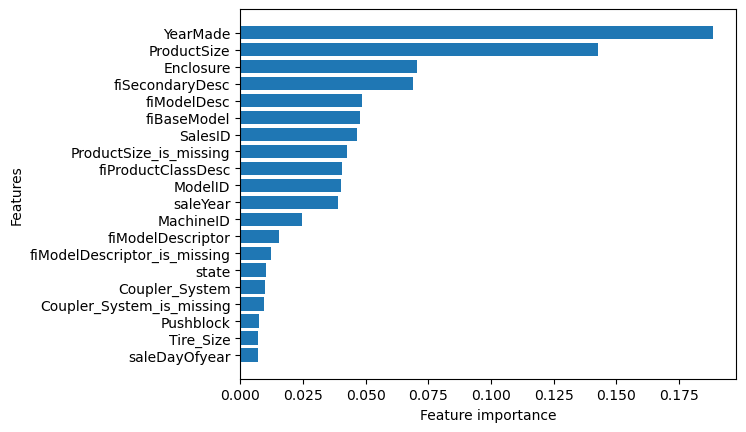

In [105]:
plot_features(X_train.columns,ideal_model.feature_importances_)

In [106]:
X_train.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1646770,1126363,8434,132,18.0,1974,0.0,0,4593,1744,...,True,True,True,True,True,False,False,False,True,True
1,1391932,154142,7008,132,99.0,1981,0.0,0,322,109,...,False,False,False,False,False,True,True,True,True,True
2,1364654,1270628,7289,132,99.0,1968,0.0,0,1783,541,...,True,True,True,True,True,True,True,True,False,False
3,1371695,1444477,1571,132,99.0,1982,0.0,0,2211,698,...,True,True,True,True,True,False,False,False,True,True
4,1740836,1531656,11933,132,99.0,1975,0.0,0,2261,711,...,True,True,True,True,True,False,False,False,True,True
